### Mathematical Model of Jak-Stat Pathway

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy import integrate
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm

In [3]:
# Parameters

k0 =  0.0039
k1 =  0.03
k2 =  0.05
k3 =  2.32
k4 =  31.14
k5 =  0.32
k6 =  2.82
k7 =  5.49
k8 =  4.37
k9 =  18.75
k10 =  0.0083
k11 =  0.24
k12 =  0.3
k13 =  1.33
k14 =  0.0048
k15 =  0.019
k16 =  0.025
k17 =  0.022

tau_avg_1 = 39
tau_avg_2 = 22
tau_avg_3 = 164
tau_avg_4 = 185

I_tot = 0.0038

q1 = 4./tau_avg_1
q2 = 4./tau_avg_2
q3 = 4./tau_avg_3
q4 = 4./tau_avg_4

In [4]:
T = 24.0*60.0
dt = .1
tspan = np.arange(0,T,dt)

In [5]:
x = np.empty((11,len(tspan)))
x[:] = np.nan

Initial conditions not optimised: $x_{1,0},x_{3,0},x_{4,0} = 0, x_{5,0}=0.5,x_{8,0} = 1$ <br>
Local parameters: $x_{2,0},x_{6,0},x_{7,0}$

In [6]:
# Initial conditions

x[0,0] = 100 # IFN gamma
x[1,0] = 0 # IFNRJ - complex IFNγ and receptor
x[2,0] = 0.005 # Cytoplasmic STAT1 Dimer 
x[3,0] = 0 # Free Nuclear STAT1 Dimer 
x[4,0] = 0 # Nuclear STAT1 Dimer bound to DNA 
x[5,0] = 0.2 # Nuclear unphosphorylated STAT1
x[6,0] = 0. # SOCS1
x[7,0] = 0 # IRF1 mRNA
x[8,0] = 0.3 # Total STAT1
x[9,0] = I_tot - x[1,0] # Free IFNγ receptor
x[10,0] = (x[8,0]-(x[5,0]+3*x[2,0]+x[3,0]+x[4,0]))/3 # Cytoplasmic unphosphorylated STAT1

In [7]:
# Kernel of Gamma function

def Gam(tau, p, q):
    return ((q**p)/math.gamma(p))*tau**(p-1)*np.exp(-q*tau)

In [8]:
def response(t,q,n):
    integral_response = 0
    t_i = round(t/dt)

    for i in range(t_i):
        tau = i*dt
        integral_response += Gam(tau,4,q)*x[n,t_i-i]*dt
    
    return integral_response

In [9]:
# Reaction rates

def reaction_rates(x,t):
    
    i = int(round(t/dt))
    
    v = np.zeros(10)
    v[0] = -k0*x[0,i]
    v[1] = k1*x[0,i]*x[9,i] - k2*x[1,i]
    v[2] = k4*x[1,i]*x[10,i]/(1+k14*response(t,q3,6))
    v[3] = k6*x[2,i]
    v[4] = k7*x[3,i] - k8*x[4,i]
    v[5] = k5*x[3,i]
    v[6] = 3*k11*x[10,i] - k12*x[5,i]
    v[7] = k13 + k9*response(t,q1,4) - k10*x[6,i]
    v[8] = k15 + k16*response(t,q2,4) - k17*x[7,i]
    v[9] = k3*response(t,q4,1)

    return v

In [10]:
# Defiie the system of differential equations

def model(x,t):

    v = reaction_rates(x,t)
    dxdt = np.zeros(11)
    dxdt[0] = v[0] - v[1]
    dxdt[1] = v[1]
    dxdt[2] = v[2]-v[3]
    dxdt[3] = 3*v[3] - v[4] - v[5]
    dxdt[4] = v[4]
    dxdt[5] = v[5] + v[6]
    dxdt[6] = v[7]
    dxdt[7] = v[8]
    dxdt[8] = v[9]
    dxdt[9] = -v[1]
    dxdt[10] = (v[8] - (v[5]+3*v[2]+v[3]))/3
    
    return dxdt

In [11]:
for i in tqdm(range(len(tspan)-1)):
    x[:,i+1] = model(x,tspan[i])*dt + x[:,i]

  0%|          | 0/14399 [00:00<?, ?it/s]

Text(0.5, 1.0, 'STAT1Dn')

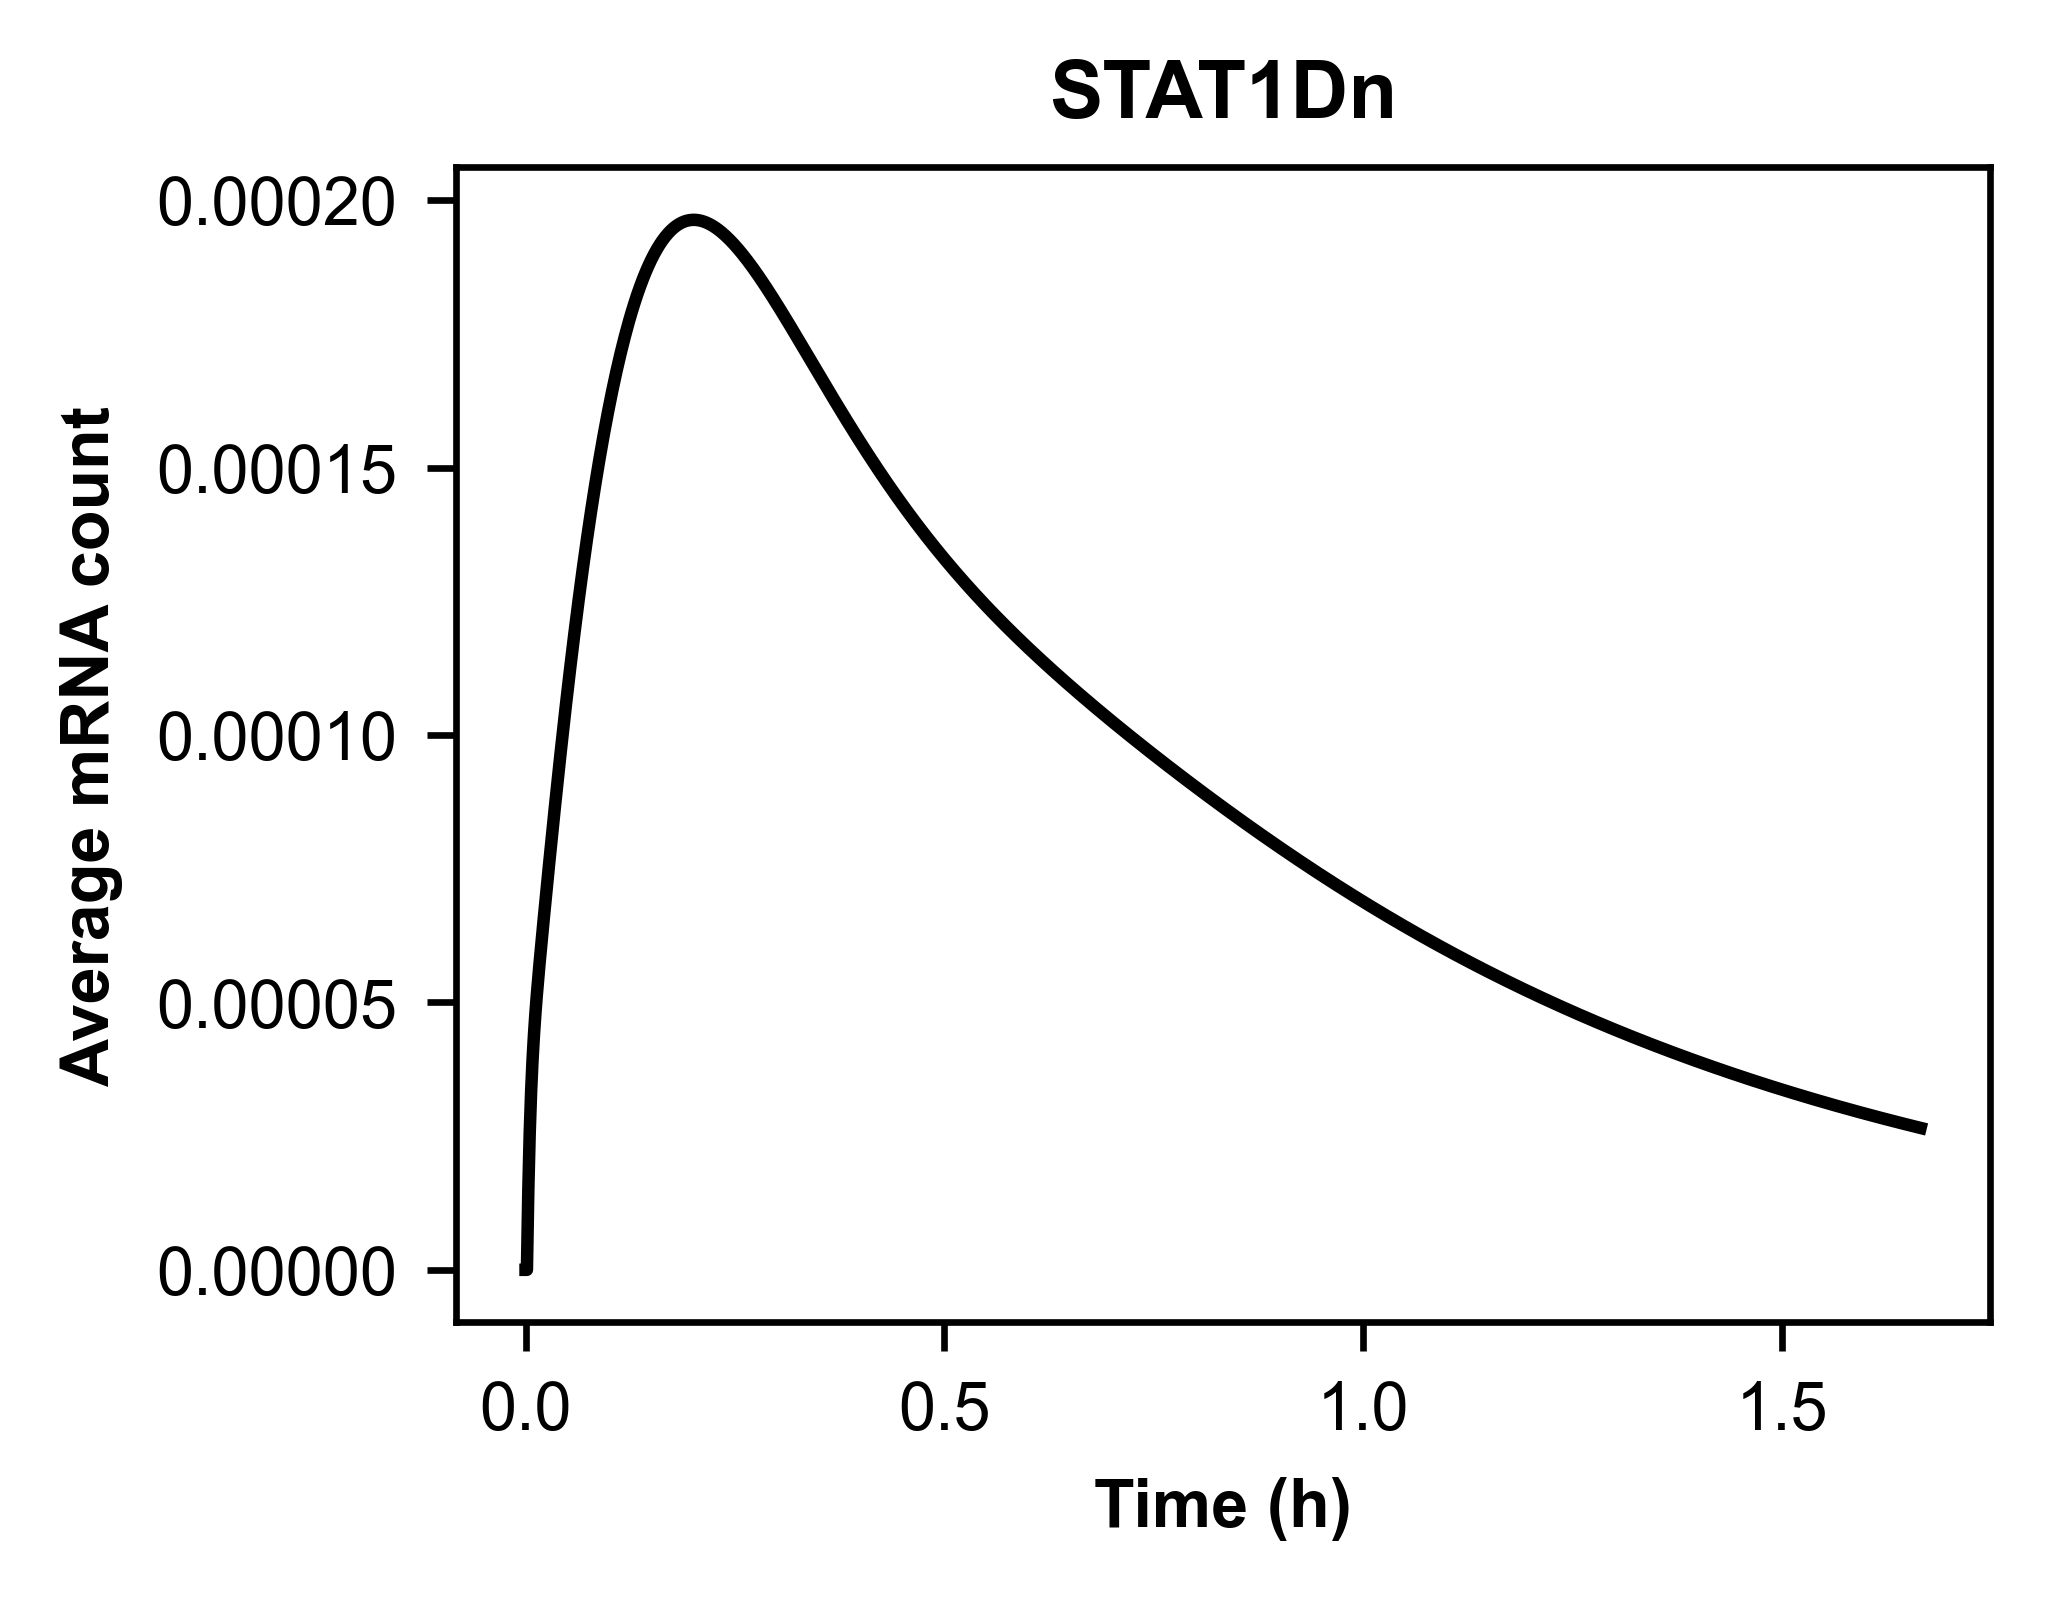

In [14]:
plt.plot(tspan[:1000]/60,6.5e-3*x[4,:1000],label='Model')
plt.xlabel('Time (h)',**font2)
plt.ylabel('Average mRNA count',**font2)
plt.title("STAT1Dn",**font2)

Text(0.5, 1.0, 'SOCS1')

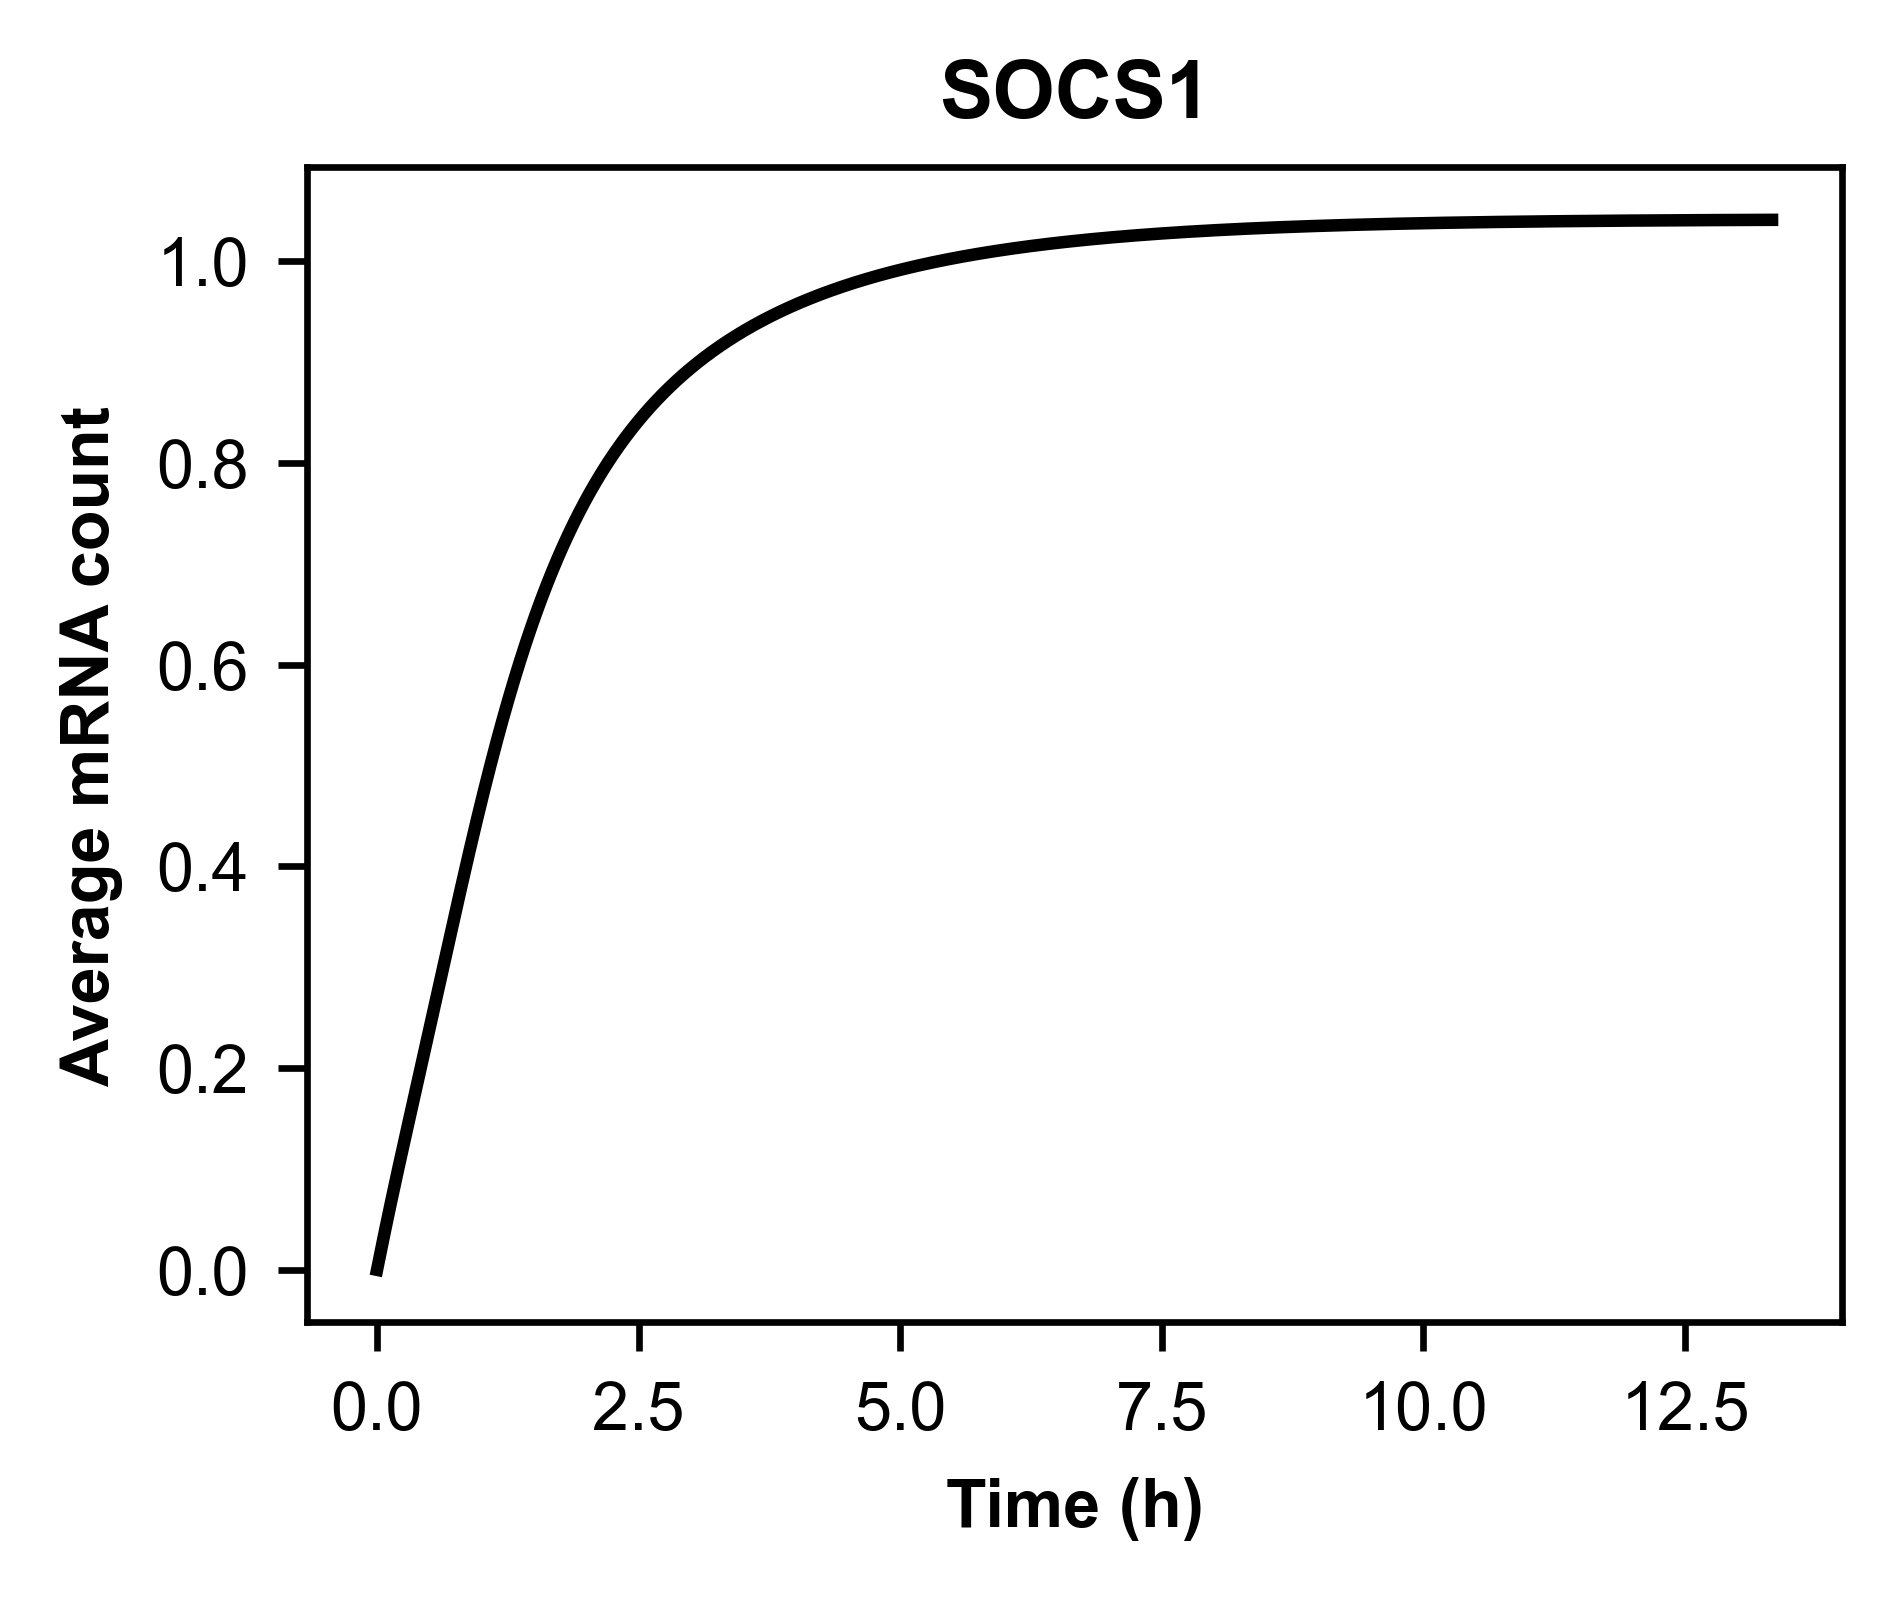

In [ ]:
plt.plot(tspan[:8000]/60,6.5e-3*x[6,:8000],label='Model')
plt.xlabel('Time (h)',**font2)
plt.ylabel('Average mRNA count',**font2)
plt.title("SOCS1",**font2)

Text(0.5, 1.0, 'SOCS1')

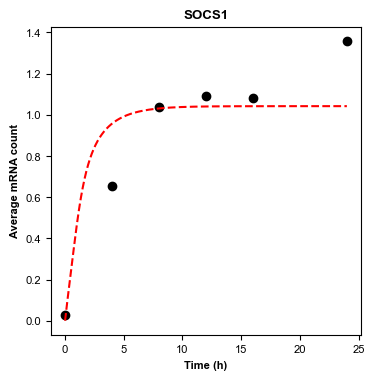

In [ ]:

plt.figure(figsize=(4,4),dpi=100)

SOCS_exp_avg = [
                0.02865329512893983,
                0.6551674778127684,
                1.0387158996968862,
                1.092747960004597,
                1.0833789854278515,
                1.3591706095185083
                ]
times = [0,4,8,12,16,24]

plt.plot(times,SOCS_exp_avg,'o',label='Experimental data')

plt.plot(tspan/60,6.5e-3*x[6,:],label='Model')
plt.xlabel('Time (h)',**font2)
plt.ylabel('Average mRNA count',**font2)
plt.title("SOCS1",**font2)

Text(0.5, 1.0, 'STAT1')

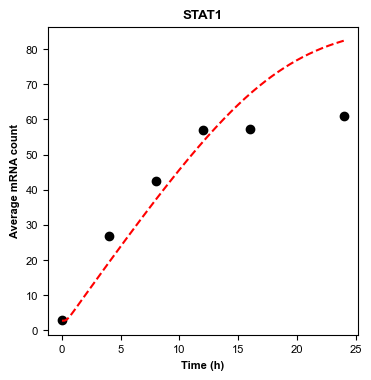

In [ ]:

plt.figure(figsize=(4,4),dpi=100)

STAT_exp_avg = [
                2.8098463141443086,
                26.90008588605783,
                42.38936346100854,
                56.90185036202735,
                57.31138380628903,
                61.02059560256053
                ]
times = [0,4,8,12,16,24]

plt.plot(times,STAT_exp_avg,'o',label='Experimental data')

plt.plot(tspan/60,9*x[8,:],label='Model')
plt.xlabel('Time (h)',**font2)
plt.ylabel('Average mRNA count',**font2)
plt.title("STAT1",**font2)

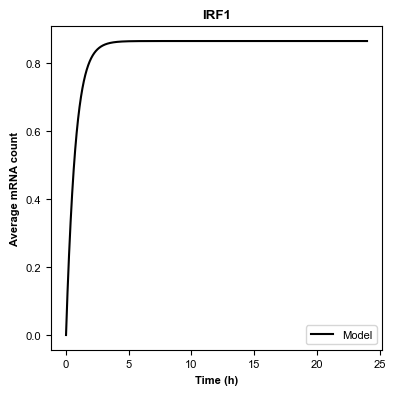

In [ ]:
plt.figure(figsize=(4,4),dpi=100)

plt.plot(tspan/60, x[7,:], label='Model')
plt.xlabel('Time (h)', **font2)
plt.ylabel('Average mRNA count', **font2)
plt.title("IRF1", **font2)
plt.legend()
plt.tight_layout()